# Examen 2 - Portafolios de inversión - O2018. Tipo 4.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Exchange_Financial_markets_Centrum_Pieniadza_NBP_AB.jpg" width="600px" height="400px" />

**Resumen.**
> Este examen pretende evaluar los conocimientos que hemos adquirido a lo largo de los dos módulos finales.

> El examen consta de dos partes. 
1. La primera trata de construir una estrategia de inversión óptima con un conjunto de activos riesgosos y un activo libre de riesgo. Deberás importar un archivo donde se encuentran reportados los precios ajustados en el cierre de dos compañías en una base mensual, deberás caracterizar los rendimientos y con base en ello construir el portafolio eficiente en media varianza, además de combinarlo con el activo libre de riesgo de acuerdo al perfil de aversión al riesgo dado.
2. La segunda parte trata de realizar la estimación de una medida de riesgo sistemático de un activo ($\beta$).

**Criterio de revisión.**
> Primera parte: tiene un valor del 70% del examen. 

> Segunda parte: tiene un valor del 30% del examen. 

> En ambas partes se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, nombrar este archivo *Examen2_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Examen2_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir a moodle.
___

## I. Primera parte. Construyendo un portafolio con activos representativos de la BMV (70%)

**Punto 1 (20%).** En el archivo `dataMX.csv` se encuentran reportados los precios mensuales ajustados en el cierre de los activos de Grupo Financiero Banorte, Grupo Financiero Inbursa, Cemex, Grupo Carso, Kimberly Clark de México, Grupo Bimbo y Alfa.

Adicionalmente, la tasa de los Cetes a un mes reportados en la página de [Banxico](http://www.anterior.banxico.org.mx/portal-mercado-valores/index.html) es de $7.94\%$ (esta tasa es anual).

1. Importar todos los precios en un DataFrame indizado por fecha. Mostrar la gráfica de estos precios (5%).
2. Obtener un DataFrame con los rendimientos porcentuales mensuales para estos activos. Mostrar la gráfica de rendimientos (5%).
3. Reportar en un DataFrame el rendimiento esperado mensual y la volatilidad mensual para cada uno de estos activos (5%).
4. Calcular las matrices de varianza-covarianza (base mensual) y de correlación (base mensual) para estos activos (5%).

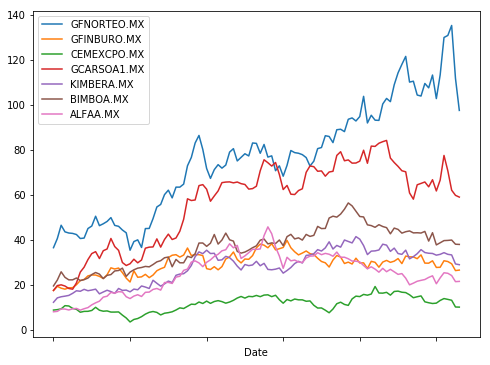

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("dataMX.csv",index_col='Date')
data=pd.DataFrame(data)
data.plot(figsize=(8,6))

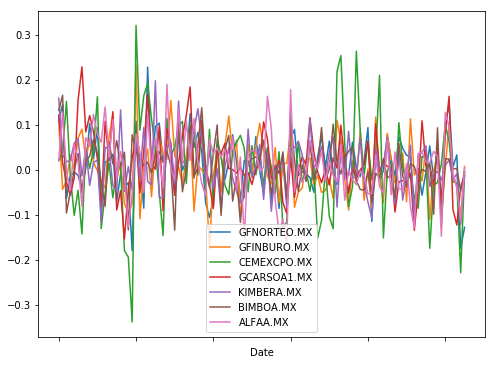

In [63]:
ret=data.pct_change().dropna()
ret.plot(figsize=(8,6))

In [64]:
men_ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=data.columns)
men_ret_sum.loc['Mean']=ret.mean()
men_ret_sum.loc['Volatility']=ret.std()
men_ret_sum

,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
Mean,0.0115783,0.00615974,0.00682374,0.0139643,0.00998281,0.00792641,0.0118888
Volatility,0.0676415,0.0669772,0.104974,0.0711668,0.0612472,0.0573827,0.0716058


In [65]:
cov=ret.cov()
cov

,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
GFNORTEO.MX,0.004575,0.001838,0.002459,0.001904,0.001536,0.001599,0.002251
GFINBURO.MX,0.001838,0.004486,0.002021,0.002137,0.001028,0.001117,0.000971
CEMEXCPO.MX,0.002459,0.002021,0.011020,0.002034,0.001393,0.000117,0.002274
GCARSOA1.MX,0.001904,0.002137,0.002034,0.005065,0.001225,0.001105,0.002038
KIMBERA.MX,0.001536,0.001028,0.001393,0.001225,0.003751,0.001363,0.001521
BIMBOA.MX,0.001599,0.001117,0.000117,0.001105,0.001363,0.003293,0.001149
ALFAA.MX,0.002251,0.000971,0.002274,0.002038,0.001521,0.001149,0.005127


In [66]:
corr=ret.corr()
corr

,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
GFNORTEO.MX,1.000000,0.405631,0.346268,0.395465,0.370840,0.411984,0.464654
GFINBURO.MX,0.405631,1.000000,0.287452,0.448323,0.250613,0.290589,0.202391
CEMEXCPO.MX,0.346268,0.287452,1.000000,0.272247,0.216618,0.019363,0.302549
GCARSOA1.MX,0.395465,0.448323,0.272247,1.000000,0.281031,0.270536,0.399852
KIMBERA.MX,0.370840,0.250613,0.216618,0.281031,1.000000,0.387681,0.346774
BIMBOA.MX,0.411984,0.290589,0.019363,0.270536,0.387681,1.000000,0.279661
ALFAA.MX,0.464654,0.202391,0.302549,0.399852,0.346774,0.279661,1.000000


**Punto 2 (25%).** Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (10%).
2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (10%).
3. Halle la covarianza y la correlación entre los dos portafolios hallados (5%)

In [67]:
rf=.0794/12
rf

0.0066166666666666665

In [68]:
# Importamos scipy
from scipy.optimize import minimize
## Construcción de parámetros
# 1. Sigma: matriz de varianza-covarianza
D=np.diag(men_ret_sum.loc['Volatility'])
Sigma = D.dot(corr).dot(D)
# 2. Eind: rendimientos esperados activos individuales
Eind = np.array(men_ret_sum.loc['Mean'])
# Función objetivo
def varianza(w, Sigma):
    return w.dot(Sigma).dot(w)
# Dato inicial
w0 = np.ones((7,))/7
# Cotas de las variables
bnds = ((0,1),)*7
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)
# Portafolio de mínima varianza
#min_var = opt.minimize(varianza, w0, args=(Sigma,), bounds=bnds, constraints=cons)
min_var = minimize(varianza, w0, args=(Sigma,),bounds=bnds ,constraints=cons)
# Pesos, rendimiento y riesgo del portafolio de mínima varianza
w_minvar = min_var.x
E_minvar = Eind.dot(w_minvar)
s_minvar = np.sqrt(varianza(w_minvar,Sigma))
info = pd.DataFrame(columns=['Portafolio min var'], index=['Media', 'Volatilidad','SR'])
info.loc['Media'] = E_minvar
info.loc['Volatilidad'] = s_minvar
info.loc['SR']=(E_minvar-rf)/s_minvar
print(info)
pesos = pd.DataFrame(columns=data.columns, index=['Peso'])
pesos.loc['Peso'] = w_minvar.round(5)
pesos

            Portafolio min var
Media               0.00973964
Volatilidad          0.0434027
SR                   0.0719534


,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
Peso,0.11439,0.16625,0.01574,0.12768,0.20159,0.24284,0.13151


In [69]:
# Función objetivo
def sharpe_r(w, Eind, Sigma, rf):
    erp=Eind.dot(w)
    varp=w.dot(Sigma).dot(w)
    return -(erp-rf)/np.sqrt(varp)
# Portafolio EMV
EMV = minimize(sharpe_r, w0, args=(Eind, Sigma, rf), bounds=bnds, constraints=cons)
w_EMV = EMV.x
E_EMV = Eind.dot(w_EMV)
s_EMV = np.sqrt(w_EMV.dot(Sigma).dot(w_EMV))
w_EMV,E_EMV, s_EMV
info = pd.DataFrame(columns=['Portafolio EMV'], index=['Media', 'Volatilidad','SR'])
info.loc['Media'] = E_EMV
info.loc['Volatilidad'] = s_EMV
info.loc['SR']=(E_EMV-rf)/s_EMV
print(info)
pesos = pd.DataFrame(columns=data.columns, index=['Peso'])
pesos.loc['Peso'] = w_EMV.round(5)
pesos

            Portafolio EMV
Media            0.0127282
Volatilidad      0.0543004
SR                0.112551


,GFNORTEO.MX,GFINBURO.MX,CEMEXCPO.MX,GCARSOA1.MX,KIMBERA.MX,BIMBOA.MX,ALFAA.MX
Peso,0.17341,0,0,0.53611,0.11513,0,0.17535


In [70]:
# Covarianza entre los portafolios
cov_port = w_minvar.dot(Sigma).dot(w_EMV)
cov_port

0.0020107901608353894

In [71]:
# Correlación entre los portafolios
corr_port = cov_port/(s_EMV*s_minvar)
corr_port

0.8531918911586973

**Punto 3 (10%).** Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (5%).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (5%).

In [72]:
# Vector de w
n=1201
w=np.linspace(-4,8,n)

fron_minvar = pd.DataFrame(columns=['wEMV', '1-wEMV', 'Ret', 'Vol', 'SR'])
fron_minvar['wEMV'] = w
fron_minvar['1-wEMV'] = 1-w
fron_minvar['Ret'] = w*E_EMV+(1-w)*E_minvar
fron_minvar['Vol'] = np.sqrt((w*s_EMV)**2+((1-w)*s_minvar)**2+2*w*(1-w)*cov_port)
fron_minvar['SR'] = (fron_minvar['Ret']-rf)/fron_minvar['Vol']
fron_minvar.round(4)

,wEMV,1-wEMV,Ret,Vol,SR
0,-4.00,5.00,-0.0022,0.1176,-0.0751
1,-3.99,4.99,-0.0022,0.1174,-0.0750
2,-3.98,4.98,-0.0022,0.1171,-0.0749
3,-3.97,4.97,-0.0021,0.1168,-0.0748
4,-3.96,4.96,-0.0021,0.1166,-0.0747
5,-3.95,4.95,-0.0021,0.1163,-0.0746
6,-3.94,4.94,-0.0020,0.1161,-0.0746
7,-3.93,4.93,-0.0020,0.1158,-0.0745
8,-3.92,4.92,-0.0020,0.1155,-0.0744
9,-3.91,4.91,-0.0019,0.1153,-0.0743


In [73]:
LAC=pd.DataFrame(index=np.arange(n),columns=['wp','wrf','E[r]','vol','SR'])
LAC['wp']=w
LAC['wrf']=1-w
LAC['E[r]']=w*E_EMV+(1-w)*rf
LAC['vol']=w*s_EMV
LAC['SR']=(LAC['E[r]']-rf)/LAC['vol']
LAC

,wp,wrf,E[r],vol,SR
0,-4.00,5.00,-0.017830,-0.217202,0.112551
1,-3.99,4.99,-0.017768,-0.216659,0.112551
2,-3.98,4.98,-0.017707,-0.216116,0.112551
3,-3.97,4.97,-0.017646,-0.215573,0.112551
4,-3.96,4.96,-0.017585,-0.215030,0.112551
5,-3.95,4.95,-0.017524,-0.214487,0.112551
6,-3.94,4.94,-0.017463,-0.213943,0.112551
7,-3.93,4.93,-0.017402,-0.213400,0.112551
8,-3.92,4.92,-0.017341,-0.212857,0.112551
9,-3.91,4.91,-0.017280,-0.212314,0.112551


**Punto 4 (15%).** 

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (8%).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, concluya acerca del porcentaje que se le asigna al portafolio EMV, si es muy bajo o muy alto, y porqué cree que se da esto (7% puntos).

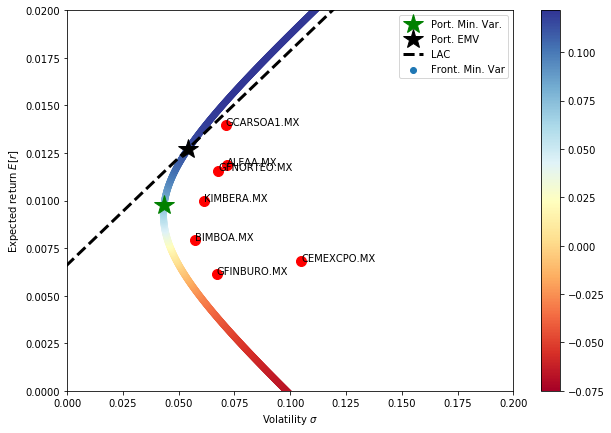

In [74]:
plt.figure(figsize=(10,7))
plt.plot(s_minvar, E_minvar, '*g', ms=20, label = 'Port. Min. Var.')
plt.plot(s_EMV, E_EMV, '*k', ms=20, label = 'Port. EMV')
columns=data.columns
x=men_ret_sum.loc['Volatility'].values
y=men_ret_sum.loc['Mean'].values
plt.plot(x,y,'ro',ms=10)
plt.text(x[0],y[0],columns[0])
plt.text(x[1],y[1],columns[1])
plt.text(x[2],y[2],columns[2])
plt.text(x[3],y[3],columns[3])
plt.text(x[4],y[4],columns[4])
plt.text(x[5],y[5],columns[5])
plt.text(x[6],y[6],columns[6])
plt.scatter(fron_minvar['Vol'], fron_minvar['Ret'], c=fron_minvar['SR'], cmap='RdYlBu', label = 'Front. Min. Var')
plt.plot(LAC['vol'],LAC['E[r]'],'k--',lw=3,label='LAC')
plt.xlabel('Volatility $\sigma$')
plt.ylabel('Expected return $E[r]$')
plt.legend(loc='best')
plt.xlim([0,.2])
plt.ylim([0,.02])

plt.colorbar()
plt.show()

In [75]:
W=(E_EMV-rf)/(4*(s_EMV**2))
X=1-W
W,X

(0.5181869283832325, 0.48181307161676745)

Al utilizar la formula que involucra el coeficiente de aversión, se obtiene w*=.5182, es decir, .4818 en el activo libre de riesgo y .5182 en el portafolio de activos riesgoso.


Lo cual implica posiciones largas en el mercado de activos (51.82% del capital) y en el activo libre de riesgo (48.18% del capital).


En este caso, la proporción entre las posiciones es muy parecida, concluyendo que casi la mitad del capital puede ir al activo libre de riesgo, esto ya es considerando las preferencias del cliente, y más esfecíficamente, su aversión al riesgo. No es ni un 1 ni un 10, sino un 4, por lo que tiene sentdo que la proporción sea parecida

W* considera la aversion al riesgo, el riesgo del activo en sí, y el exceso de rendimiento que se obtenga del los activos riesgosos.


___
## II. Segunda parte. Estimando $\beta$ de un activo (30%)

**Punto 1 (15%).** En el archivo `dataUS.csv` se encuentran reportados los precios mensuales ajustados en el cierre del índice S&P 500 y los activos de Netflix, Nvidia, Facebook, y Google.

1. Importar los precios de *S&P 500 (^GSPC)* y de *Google (GOOGL)* en un DataFrame indizado por fecha (5%). 
2. Obtener un DataFrame con los rendimientos porcentuales mensuales para estos activos (5%).
3. Calcular las matriz de varianza-covarianza (base mensual) (5%).

In [76]:
data=pd.read_csv("dataUS.csv",index_col='Date',usecols=['Date','^GSPC','GOOGL'])
data=pd.DataFrame(data)

In [77]:
ret=data.pct_change().dropna()
men_ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=data.columns)
men_ret_sum.loc['Mean']=ret.mean()
men_ret_sum.loc['Volatility']=ret.std()
men_ret_sum

,^GSPC,GOOGL
Mean,0.00753349,0.00980958
Volatility,0.0272445,0.0559764


In [78]:
cov=ret.cov()
cov

,^GSPC,GOOGL
^GSPC,0.000742,0.001009
GOOGL,0.001009,0.003133


**Punto 2 (15%).** Usando los datos del punto anterior:

1. Estime $\beta_{GOOGL}$ la beta de las acciones de Google (5%).
2. Compare su beta estimada con la que reporta Yahoo! Finance (5%).
3. ¿Qué puede decir acerca del valor de $\beta_{GOOGL}$?, ¿Qué significa? (5%).

In [79]:
# Beta de Google
beta_GOOGL=cov['GOOGL']['^GSPC']/cov['^GSPC']['^GSPC']
np.round(beta_GOOGL,2)

1.36

beta de Yahoo Finance: 1.32

$\beta_p>1$, entonces $E[r_p]>E[r_M]$.

la beta de google es la covarianza del portafolio de mercado (^GSPC) con el activo individual (GOOGL)


Viendo que la beta de google es mayor a 1, se puede saber que el rendimeinto esperado del del activo, es mayor al rendimiento esperado del portafolio de mercado, en este caso, del indice que se usó

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>